# Texas Licenses

We originall got our dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [213]:
import pandas as pd
import numpy as np

%matplotlib inline

## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [214]:
df = pd.read_csv("licfile.csv", dtype={"EXPIRATION": str, "LICNUMBER": str, "MAILCOUNTYCODE": str, "MAILZIP": str, "TELEPHONE": str })
df.head()

,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,08102017,"RISINGER, JIM MARVIN.1",7668 S US HWY 59,Unnamed: 11,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,Unnamed: 17,N
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


In [215]:
df.head()

,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,08102017,"RISINGER, JIM MARVIN.1",7668 S US HWY 59,Unnamed: 11,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,Unnamed: 17,N
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [216]:
df = pd.read_csv("licfile.csv", dtype={"EXPIRATION": str, "LICNUMBER": str, "MAILCOUNTYCODE": str, "MAILZIP": str, "TELEPHONE": str })
df.head()

,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,08102017,"RISINGER, JIM MARVIN.1",7668 S US HWY 59,Unnamed: 11,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,Unnamed: 17,N
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [217]:
df.columns = [
'LICTYPE',
'LICNUMBER',
'BIZCOUNTY',
'BIZNAME',
'BIZLINE1',
'BIZLINE2',
'BIZCITYSTATE',
'BIZTELEPHONE',
'EXPIRATION',
'OWNER',
'MAILLINE1',
'MAILLINE2',
'MAILCITYSTATE',
'MAILCOUNTYCODE',
'MAILCOUNTY',
'MAILZIP',
'TELEPHONE',
'LICSUBTYPE',
'CEFLAG'
  ]

df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

List slicing forever! It's the thing with the `[]`. There are like five ways to do this one.

In [218]:
df['EXPIRATION'] = pd.to_datetime(df['EXPIRATION'])
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.012292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.009262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.011042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.002252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.005042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


Check the first five expirations to make sure they look right.

# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [219]:
df.LICTYPE.value_counts(ascending=False).head(10)

Cosmetology Operator        151206
Apprentice Electrician      110593
Cosmetology Manicurist       49563
Journeyman Electrician       38170
A/C Technician               27959
Cosmetology Esthetician      23613
Cosmetology Beauty Salon     23577
Master Electrician           16810
A/C Contractor               16376
Barber, Class A              16019
Name: LICTYPE, dtype: int64

## 6. What are the top 10 least common?

In [220]:
df.LICTYPE.value_counts(ascending=False).tail(10)

Elevator Responsible Party CE Provider             8
Mobile Cosmetology Esthetician Specialty Saloon    5
Barber Hair Weaving Shop                           4
Barber Hair Braiding Shop                          4
Booting CE Provider                                3
Mobile Cosmetology Esthetician/Manicure Saloon     2
Cosmetology Wig Instructor                         2
Licensed Court Interpreter CE Provider             2
Mobile Cosmetology Manicure Specialty Saloon       2
Legal Service Contract Admin                       1
Name: LICTYPE, dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [221]:
# Yes I know I left this in here, it's a learning experience!
df[df['LICTYPE'].str.contains("Electrician", na=False)]

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
47024,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.005272017,"BOLTON, MARION N",2262 HARBOR BOLTON RD,NaN,FRANKLIN TX 77856-5367,395.0,ROBERTSON,77856,9798284713,AE,N
47025,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.010212017,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,NaN,SAN ANTONIO TX 78250-4478,29.0,BEXAR,78250,2104887491,AE,N
47026,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.005282017,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,NaN,PASADENA TX 77502-2218,201.0,HARRIS,77502,7133824802,AE,N
47027,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.006182016,"COPELAND, MARCUS A",201 N MADISON AVE,NaN,MOUNT PLEASANT TX 75455-3944,449.0,TITUS,75455,9035634950,AE,N
47028,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.010262016,"ANGLIN, DAVID LEE",8066 FM 1001,NaN,COOKVILLE TX 75558-3064,449.0,TITUS,75558,9039462547,AE,N
47029,Apprentice Electrician,32428,HARRIS,"VALLEJO, ARMANDO E",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.010212016,"VALLEJO, ARMANDO E",3903 ERBY ST TRLR 88,NaN,HOUSTON TX 77087-1250,201.0,HARRIS,77087,8325285241,AE,N
47030,Apprentice Electrician,32440,TRAVIS,"RODRIGUEZ, REYNALDO",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.012142017,"RODRIGUEZ, REYNALDO",10905 SHAWN LEE CV,NaN,AUSTIN TX 78753-3363,453.0,TRAVIS,78753,7372474738,AE,N
47031,Apprentice Electrician,32442,CASS,"TERRY, ALAN D JR",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.006032017,"TERRY, ALAN D JR",605 KEASLER,NaN,HUGHES SPRINGS TX 75656-2575,67.0,CASS,75656,9036392017,AE,N
47032,Apprentice Electrician,32450,HARRIS,"TREVINO, ADIEL A",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.006112017,"TREVINO, ADIEL A",3824 LYDIA ST,NaN,HOUSTON TX 77021-6125,201.0,HARRIS,77021,7134406945,AE,N
47033,Apprentice Electrician,32453,GALVESTON,"ROACHELL, LAWRENCE S",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.011172017,"ROACHELL, LAWRENCE S",115 LAUREL MEADOW CT,NaN,LA MARQUE TX 77568-2497,167.0,GALVESTON,77568,4095390843,AE,N


## 8. How many of the rows of LICTYPE are NaN?

In [222]:
df.LICTYPE.isnull().value_counts()

False    590729
True       7086
Name: LICTYPE, dtype: int64

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

In [223]:
electricians = df[df['LICTYPE'].str.contains('Electrician', na=False)]
electricians

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
47024,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.005272017,"BOLTON, MARION N",2262 HARBOR BOLTON RD,NaN,FRANKLIN TX 77856-5367,395.0,ROBERTSON,77856,9798284713,AE,N
47025,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.010212017,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,NaN,SAN ANTONIO TX 78250-4478,29.0,BEXAR,78250,2104887491,AE,N
47026,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.005282017,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,NaN,PASADENA TX 77502-2218,201.0,HARRIS,77502,7133824802,AE,N
47027,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.006182016,"COPELAND, MARCUS A",201 N MADISON AVE,NaN,MOUNT PLEASANT TX 75455-3944,449.0,TITUS,75455,9035634950,AE,N
47028,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.010262016,"ANGLIN, DAVID LEE",8066 FM 1001,NaN,COOKVILLE TX 75558-3064,449.0,TITUS,75558,9039462547,AE,N
47029,Apprentice Electrician,32428,HARRIS,"VALLEJO, ARMANDO E",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.010212016,"VALLEJO, ARMANDO E",3903 ERBY ST TRLR 88,NaN,HOUSTON TX 77087-1250,201.0,HARRIS,77087,8325285241,AE,N
47030,Apprentice Electrician,32440,TRAVIS,"RODRIGUEZ, REYNALDO",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.012142017,"RODRIGUEZ, REYNALDO",10905 SHAWN LEE CV,NaN,AUSTIN TX 78753-3363,453.0,TRAVIS,78753,7372474738,AE,N
47031,Apprentice Electrician,32442,CASS,"TERRY, ALAN D JR",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.006032017,"TERRY, ALAN D JR",605 KEASLER,NaN,HUGHES SPRINGS TX 75656-2575,67.0,CASS,75656,9036392017,AE,N
47032,Apprentice Electrician,32450,HARRIS,"TREVINO, ADIEL A",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.006112017,"TREVINO, ADIEL A",3824 LYDIA ST,NaN,HOUSTON TX 77021-6125,201.0,HARRIS,77021,7134406945,AE,N
47033,Apprentice Electrician,32453,GALVESTON,"ROACHELL, LAWRENCE S",NaN,NaN,NaN,NaN,1970-01-01 00:00:00.011172017,"ROACHELL, LAWRENCE S",115 LAUREL MEADOW CT,NaN,LA MARQUE TX 77568-2497,167.0,GALVESTON,77568,4095390843,AE,N


This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

In [224]:
electricians.fillna(False)
#df.LICTYPE.str.contains('Electrician').fillna(False)

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
47024,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",False,False,False,False,1970-01-01 00:00:00.005272017,"BOLTON, MARION N",2262 HARBOR BOLTON RD,False,FRANKLIN TX 77856-5367,395,ROBERTSON,77856,9798284713,AE,N
47025,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",False,False,False,False,1970-01-01 00:00:00.010212017,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,False,SAN ANTONIO TX 78250-4478,29,BEXAR,78250,2104887491,AE,N
47026,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",False,False,False,False,1970-01-01 00:00:00.005282017,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,False,PASADENA TX 77502-2218,201,HARRIS,77502,7133824802,AE,N
47027,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",False,False,False,False,1970-01-01 00:00:00.006182016,"COPELAND, MARCUS A",201 N MADISON AVE,False,MOUNT PLEASANT TX 75455-3944,449,TITUS,75455,9035634950,AE,N
47028,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",False,False,False,False,1970-01-01 00:00:00.010262016,"ANGLIN, DAVID LEE",8066 FM 1001,False,COOKVILLE TX 75558-3064,449,TITUS,75558,9039462547,AE,N
47029,Apprentice Electrician,32428,HARRIS,"VALLEJO, ARMANDO E",False,False,False,False,1970-01-01 00:00:00.010212016,"VALLEJO, ARMANDO E",3903 ERBY ST TRLR 88,False,HOUSTON TX 77087-1250,201,HARRIS,77087,8325285241,AE,N
47030,Apprentice Electrician,32440,TRAVIS,"RODRIGUEZ, REYNALDO",False,False,False,False,1970-01-01 00:00:00.012142017,"RODRIGUEZ, REYNALDO",10905 SHAWN LEE CV,False,AUSTIN TX 78753-3363,453,TRAVIS,78753,7372474738,AE,N
47031,Apprentice Electrician,32442,CASS,"TERRY, ALAN D JR",False,False,False,False,1970-01-01 00:00:00.006032017,"TERRY, ALAN D JR",605 KEASLER,False,HUGHES SPRINGS TX 75656-2575,67,CASS,75656,9036392017,AE,N
47032,Apprentice Electrician,32450,HARRIS,"TREVINO, ADIEL A",False,False,False,False,1970-01-01 00:00:00.006112017,"TREVINO, ADIEL A",3824 LYDIA ST,False,HOUSTON TX 77021-6125,201,HARRIS,77021,7134406945,AE,N
47033,Apprentice Electrician,32453,GALVESTON,"ROACHELL, LAWRENCE S",False,False,False,False,1970-01-01 00:00:00.011172017,"ROACHELL, LAWRENCE S",115 LAUREL MEADOW CT,False,LA MARQUE TX 77568-2497,167,GALVESTON,77568,4095390843,AE,N


## 10. What's the most popular kind of electrician?

In [225]:
electricians.LICTYPE.value_counts().sort_values(ascending=False).head(10)

Apprentice Electrician                110593
Journeyman Electrician                 38170
Master Electrician                     16810
Apprentice Sign Electrician             3994
Maintenance Electrician                 1184
Master Sign Electrician                  542
Journeyman Sign Electrician              391
Electrician CE Provider                  109
Electrician Apprenticeship Program        45
Name: LICTYPE, dtype: int64

## 11. Graph it, with the largest bar on top.

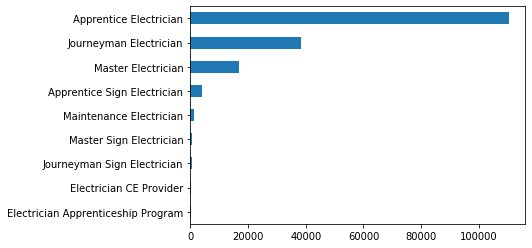

In [226]:
electricians.LICTYPE.value_counts().sort_values(ascending=True).plot(kind='barh')

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [227]:
electricians.LICTYPE.str.contains("Sign").value_counts()

False    166911
True       4927
Name: LICTYPE, dtype: int64

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [228]:
df.BIZNAME.fillna("").str.extract('(.*),',expand=False)

0            WILLIAMS
1             GUEVARA
2              BOWERS
3              DEMSKY
4            THOMPSON
5              TUCKER
6              COOPER
7         BLANKENSHIP
8               DAWES
9              LESTER
10            MANCILL
11         HUDDLESTON
12             JORDAN
13              IRWIN
14               HALL
15              JAMES
16             SIDAWI
17              SMITH
18           FERGUSON
19           MCKINLEY
20             SOWELL
21             SEVIER
22         SOMERVILLE
23           BARCLIFT
24               FORD
25            SCHAFER
26           MARTINEZ
27            CLEMANS
28           MARTINEZ
29             CARSON
             ...     
597785        SNUFFER
597786       MARTINEZ
597787         YOSTEN
597788          CLICK
597789          PENSE
597790           LARA
597791          SMITH
597792      BINNICKER
597793         CHAVEZ
597794       GUERRERO
597795         SAVAGE
597796          ADAMS
597797          SCOTT
597798           HILL
597799    

## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [229]:
df['LASTNAME'] = df.BIZNAME.fillna("").str.extract('(.*),',expand=False)

# 15. What are the ten most popular last names?

In [230]:
df.LASTNAME.value_counts(ascending=False).head(10)

NGUYEN       22352
TRAN          8165
GARCIA        5688
LE            5612
MARTINEZ      4809
RODRIGUEZ     4721
HERNANDEZ     4468
PHAM          4006
GONZALEZ      3693
SMITH         3351
Name: LASTNAME, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [231]:
df[df.LASTNAME == 'NGUYEN'].LICTYPE.value_counts().head()

Cosmetology Manicurist     12855
Cosmetology Operator        4039
Cosmetology Esthetician     2881
Cosmetologist               1874
Apprentice Electrician       195
Name: LICTYPE, dtype: int64

In [232]:
df[df.LASTNAME == 'TRAN'].LICTYPE.value_counts().head()

Cosmetology Manicurist     4674
Cosmetology Operator       1474
Cosmetology Esthetician    1032
Cosmetologist               712
Apprentice Electrician       95
Name: LICTYPE, dtype: int64

In [233]:
df[df.LASTNAME == 'LE'].LICTYPE.value_counts().head()

Cosmetology Manicurist     3276
Cosmetology Operator        953
Cosmetology Esthetician     730
Cosmetologist               497
A/C Technician               43
Name: LICTYPE, dtype: int64

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [234]:
df[df.LASTNAME.isin(['NGUYEN', 'TRAN', 'LE'])].LICTYPE.value_counts().head()

Cosmetology Manicurist     20805
Cosmetology Operator        6466
Cosmetology Esthetician     4643
Cosmetologist               3083
Apprentice Electrician       327
Name: LICTYPE, dtype: int64

## 18. Most popular licenses for Garcia? Rodriguez? Martinez?

Those are the 3 most common last names for self-identifying Hispanics in the USA.

In [235]:
df[df.LASTNAME == 'GARCIA'].LICTYPE.value_counts().head()

Apprentice Electrician    1952
Cosmetology Operator      1672
Journeyman Electrician     493
A/C Technician             333
Barber, Class A            186
Name: LICTYPE, dtype: int64

In [236]:
df[df.LASTNAME == 'RODRIGUEZ'].LICTYPE.value_counts().head()

Apprentice Electrician    1573
Cosmetology Operator      1390
Journeyman Electrician     386
A/C Technician             320
Barber, Class A            138
Name: LICTYPE, dtype: int64

In [237]:
df[df.LASTNAME == 'MARTINEZ'].LICTYPE.value_counts().head()

Apprentice Electrician    1618
Cosmetology Operator      1388
Journeyman Electrician     387
A/C Technician             317
Barber, Class A            149
Name: LICTYPE, dtype: int64

## 19. Most popular license for anyone with a last name that ENDS in `-ez`

The answer is not `.str.contains('ez')`, but it isn't necessarily too different. **Make sure your numbers match mine.**

One way involves a `.str.` method that check if a string ends with something, the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before). If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [238]:
df[df.LASTNAME.str.endswith('EZ', na=False)].LICTYPE.value_counts()

Apprentice Electrician                          16065
Cosmetology Operator                            13885
Journeyman Electrician                           3529
A/C Technician                                   2889
Barber, Class A                                  1277
A/C Contractor                                    858
Master Electrician                                763
Cosmetology Esthetician                           748
Tow Truck Operator (Consent Tow)                  695
Cosmetology Manicurist                            633
Tow Truck Operator (Incident Management)          620
Apprentice Sign Electrician                       602
Legal Service Contract Sales Rep                  415
Cosmetology Operator Instructor                   400
Used Auto Parts Recycler Employee                 389
VSF Employee                                      263
Residential Wireman                               251
Dual Towing Operator(IM)/VSF Employee             238
Property Tax Appraiser      

## 20. Get that as a percentage

In [239]:
df[df.LASTNAME.str.endswith('EZ', na=False)].LICTYPE.value_counts(normalize=True)*100

Apprentice Electrician                          35.495703
Cosmetology Operator                            30.678981
Journeyman Electrician                           7.797344
A/C Technician                                   6.383261
Barber, Class A                                  2.821538
A/C Contractor                                   1.895756
Master Electrician                               1.685853
Cosmetology Esthetician                          1.652710
Tow Truck Operator (Consent Tow)                 1.535606
Cosmetology Manicurist                           1.398617
Tow Truck Operator (Incident Management)         1.369893
Apprentice Sign Electrician                      1.330122
Legal Service Contract Sales Rep                 0.916945
Cosmetology Operator Instructor                  0.883802
Used Auto Parts Recycler Employee                0.859498
VSF Employee                                     0.581100
Residential Wireman                              0.554586
Dual Towing Op

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [240]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

,name,sentence
0,Mary,I am 90 years old
1,Jack,I am 4 years old
2,Anne,I am 27 years old
3,Joel,I am 13 years old


In [241]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

0    90
1     4
2    27
3    13
Name: sentence, dtype: object

In [242]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

,name,sentence,age
0,Mary,I am 90 years old,90
1,Jack,I am 4 years old,4
2,Anne,I am 27 years old,27
3,Joel,I am 13 years old,13


**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [243]:
df['OWNER'].head(10)

0         WILLIAMS, JON ANDRE
1       GUEVARA, JUAN ANTONIO
2    BOWERS, JAMES BRISCOE II
3         DEMSKY, JOHN EDWARD
4           THOMPSON, RANDY D
5          TUCKER, MONTE EARL
6        COOPER, THOMAS JAMES
7     BLANKENSHIP, KERRY NEIL
8      DAWES, NICHOLAS MORGAN
9        LESTER, TIMMY EUGENE
Name: OWNER, dtype: object

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

In [244]:
df['OWNER'].str.extract(',(.*)', expand=False).head(10)

0            JON ANDRE
1         JUAN ANTONIO
2     JAMES BRISCOE II
3          JOHN EDWARD
4              RANDY D
5           MONTE EARL
6         THOMAS JAMES
7           KERRY NEIL
8      NICHOLAS MORGAN
9         TIMMY EUGENE
Name: OWNER, dtype: object

## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [245]:
df['FIRSTNAME'] = df['OWNER'].str.extract(',(.*)', expand=False)
df['FIRSTNAME'].head()

0            JON ANDRE
1         JUAN ANTONIO
2     JAMES BRISCOE II
3          JOHN EDWARD
4              RANDY D
Name: FIRSTNAME, dtype: object

# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [246]:
df['FIRSTNAME'].isnull().value_counts()

False    516214
True      81601
Name: FIRSTNAME, dtype: int64

What do their names look like?

In [247]:
df[df['FIRSTNAME'].isnull()].head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME,FIRSTNAME
28021,Appliance Installation Contractor,101,HARRIS,APPLIANCE INSTALLATION BY SPECIAL D LLC,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.005232017,APPLIANCE INSTALLATION BY SPECIAL D LLC,...,NaN,HOUSTON TX 77093,201.0,HARRIS,77093,2815363711,RAIC,N,NaN,NaN
28022,Appliance Installation Contractor,103,DALLAS,CAPITAL DISTRIBUTING INC,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.004082017,CAPITAL DISTRIBUTING INC,...,NaN,DALLAS TX 75247-6103,113.0,DALLAS,75247,2146382681,RAIC,N,NaN,NaN
28023,Appliance Installation Contractor,104,DALLAS,INSTALLCO LLC,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.004082017,INSTALLCO LLC,...,NaN,DALLAS TX 75247-6103,113.0,DALLAS,75247,2142761033,RAIC,N,NaN,NaN
28024,Appliance Installation Contractor,107,BOWIE,LAFFERTYS TV & APPLIANCE INC,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.003202018,LAFFERTYS TV & APPLIANCE INC,...,NaN,TEXARKANA TX 75503,37.0,BOWIE,75503,9037942581,RAIC,N,NaN,NaN
28025,Appliance Installation Contractor,108,FREESTONE,BALLARD COMPANY,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.004022017,BALLARD COMPANY,...,NaN,FAIRFIELD TX 75840,161.0,FREESTONE,75840,9033895774,RAIC,N,NaN,NaN


## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

In [248]:
df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = 'XNAME'

How many empty first names do we have now?

In [249]:
df[df.FIRSTNAME == 'NAME'].shape

(0, 21)

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [250]:
df['FIRSTNAME'].value_counts().head()

XNAME      81601
 DAVID      1211
 JOSE A     1083
 JOSE       1048
 DANIEL      999
Name: FIRSTNAME, dtype: int64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and okay honestly anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [251]:
df[df.LICTYPE.str.contains('Cosmetology Operator', na=False)].fillna(False).FIRSTNAME.value_counts()

 MARIA                597
 ELIZABETH            442
 JESSICA              408
 JENNIFER             343
 VERONICA             315
 PATRICIA             280
 SANDRA               277
 ASHLEY               269
 STEPHANIE            246
 MARIA GUADALUPE      241
 LAURA                224
 MELISSA              222
 DIANA                218
 AMANDA               215
 YOLANDA              215
 MICHELLE             213
 LETICIA              209
 CLAUDIA              199
 MONICA               198
 ADRIANA              194
 GUADALUPE            192
 CYNTHIA              185
 NANCY                183
 KIMBERLY             182
 PATRICIA ANN         174
 VANESSA              173
 BRENDA               172
 GABRIELA             171
 MARTHA               170
 CHRISTINA            168
                     ... 
 EFFIE                  1
 DELF                   1
 JUANITA H              1
 INEZ CECILIA           1
 GRISELLE MARIE         1
 THELMA JANE            1
 ELVONDA LASHUN         1
 WILLIAM ROY

In [252]:
df[df.LICTYPE.str.contains('Cosmetology Esthetician', na=False)].fillna(False).FIRSTNAME.value_counts()

XNAME               8576
 JENNIFER             67
 JESSICA              57
 AMANDA               53
 ASHLEY               48
 MICHELLE             47
 THUY THI             46
 ELIZABETH            45
 LLC                  42
 PHUONG THI           41
 LAN THI              40
 HOA THI              38
 CINDY                38
 AMY                  37
 SARAH                37
 NANCY                35
 STEPHANIE            34
 LAURA                33
 TIFFANY              32
 KIM                  32
 HEATHER              32
 REBECCA              31
 VANESSA              31
 THUY THANH           31
 MARIA                30
 HUONG THI            30
 MONICA               30
 LISA                 30
 HANH THI             30
 THU THI              29
                    ... 
 MICHELLE NGUYEN       1
 CORNELIA ADAMUT       1
 BROOKE ANGELA         1
 MARISELA B.           1
 ARISSA D              1
 JENNIFER FARIS        1
 JING MEI              1
 PHUNG BOI             1
 JOSE M                1


In [253]:
df[df.LICTYPE.str.contains('Cosmetologist', na=False)].fillna(False).FIRSTNAME.value_counts()

 PHUONG THI         33
 THUY THI           32
 HOA THI            27
 NGA THI            25
 KIM                22
 HUONG THI          22
 NANCY              20
 MAI THI            20
 LAN THI            20
 HANH THI           19
 THUY THANH         19
 HONG THI           19
 THANH THI          18
 AMY                18
 TINA               17
 THU THI            17
 TAMMY              16
 HIEN THI           16
 THUY T             16
 MICHELLE           16
 TRANG THI          15
 JENNY              14
 TRANG THUY         14
 TRACY              14
 KELLY              13
 TIFFANY            13
 VIVIAN             12
 HA THI             12
 JULIE              12
 DUNG THI           12
                    ..
 MONICA ALICIA       1
 HONG THUY           1
 XUAN NGOC THI       1
 XUANVUI             1
 TRI THI             1
 THU THI NGOC        1
 BAO KHANH TRAN      1
 KIM-THUY THI        1
 PHUONG DUNG         1
 SINH THI            1
 SONIA LETICIA       1
 HANH VU             1
 ANH-THU T 

## 27. Most popular first names for anything involving electricity?

In [254]:
df[df['LICTYPE'].str.contains("Electrician", na=False)].FIRSTNAME.value_counts()

 JOSE A                859
 JOSE                  721
 DAVID                 699
 DANIEL                680
 JOSE L                530
 JUAN                  503
 JESUS                 498
 MIGUEL A              457
 RICARDO               456
 ALEJANDRO             442
 CARLOS                442
 MICHAEL A             415
 EDUARDO               399
 MICHAEL               392
 LUIS A                390
 FRANCISCO             372
 JUAN C                354
 JOSE M                349
 JORGE                 347
 DAVID A               331
 ANTONIO               328
 ROBERTO               326
 JAVIER                324
 FERNANDO              321
 OSCAR                 319
 MANUEL                311
 MARK A                309
 GERARDO               307
 LUIS                  305
 RAUL                  299
                      ... 
 JAVIER I JR             1
 MITCHELL E              1
 NASRUDIN N              1
 KYLE ROY                1
 SOMCHANH S              1
 ROBERT C SR             1
 

## 28. Can we be any more obnoxious in this assignment?

Not only are we going to detect gender from first names, but we're also going to use a library that has the terrible name of [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again. Apparently Python didn't get the message.

Except actually sexmachine doesn't work on Python 3 because it's from 300 BC so we're going to use a Python 3 fork called [gender guesser](https://pypi.python.org/pypi/gender-guesser/) (hooray!).

#### Use `pip` or `pip3` to install gender-guesser.

In [255]:
!pip install gender-guesser

You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


#### Test to see that it works

In [256]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

'male'

In [257]:
detector.get_gender('Jose')

'male'

In [258]:
detector.get_gender('Maria')

'female'

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [259]:
df['FIRSTNAME'].fillna('').str.split().str.get(0).apply(lambda name: detector.get_gender(str(name).lower()))

0                  male
1                  male
2                  male
3                  male
4           mostly_male
5                  male
6                  male
7         mostly_female
8                  male
9                  male
10                 male
11          mostly_male
12                 male
13                 male
14                 male
15              unknown
16                 male
17                 male
18                 andy
19                 male
20              unknown
21               female
22                 male
23                 male
24               female
25                 male
26        mostly_female
27                 male
28                 male
29                 male
              ...      
597785             male
597786             male
597787      mostly_male
597788             male
597789             male
597790             male
597791             male
597792             male
597793             male
597794          unknown
597795          

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

In [262]:
df['GENDER'] = gender
gender = df['FIRSTNAME'].fillna('').str.split().str.get(0).apply(lambda name: detector.get_gender(str(name).lower()))

In [263]:
df.GENDER.value_counts().sort_values(ascending=False)

male             228992
female           148143
unknown          132170
mostly_female     41435
mostly_male       26490
andy              20585
Name: GENDER, dtype: int64

## 30. We like taking risks - get rid of ambiguity

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [264]:
import numpy as np

df['GENDER'] = df['GENDER'].apply(lambda g: g.replace('mostly_female', 'female'))
df['GENDER'] = df['GENDER'].apply(lambda g: g.replace('mostly_male', 'male'))


df['GENDER'] = df['GENDER'].replace('andy', np.nan)
df['GENDER'] = df['GENDER'].replace('unknown', np.nan)

## 31. Do men or women have more licenses? What is the percentage of unknown genders?

In [265]:
df.GENDER.value_counts().sort_values(ascending=False)

male      255482
female    189578
Name: GENDER, dtype: int64

In [266]:
df['GENDER'].isnull().value_counts(normalize=True)*100

False    74.447781
True     25.552219
Name: GENDER, dtype: float64

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

In [267]:
df[df['GENDER'].isnull()].FIRSTNAME.value_counts()

XNAME               81601
 INC                  713
 LLC                  608
 INC.                 270
 LAN THI              202
 HONG THI             162
 THANH THI            132
 TRANG T              118
 TRANG THI            111
 HUE THI              107
 HANG THI             105
 DUNG THI             103
 THANH                 99
 DUNG T                88
 JO ANN                85
 ROCIO                 85
 DUNG                  84
 SANTOS                83
 TRANG THUY            82
 HONG T                80
 YEN THI               78
 LINH                  77
 XUAN THI              73
 THANH T               70
 HANG T                69
LLC                    67
 JOAQUIN               66
 TRANG                 66
 ARACELY               64
 RAYMUNDO              64
                    ...  
 TARREN L               1
 LEXY CLAUDIA           1
 BALDEMAR N             1
 SEUNG HAE              1
 YEN T-KIM              1
 DELEON DONNELL         1
 WENETTA TRAINER        1
 QUOI VAN   

## 31. What are the most popular licenses for men? For women?

In [268]:
df[df.GENDER == 'male'].LICTYPE.value_counts().head()

Apprentice Electrician    95604
Journeyman Electrician    35507
A/C Technician            24696
Master Electrician        15770
Cosmetology Operator      13543
Name: LICTYPE, dtype: int64

In [269]:
df[df.GENDER == 'female'].LICTYPE.value_counts().head()

Cosmetology Operator       114598
Cosmetology Manicurist      24332
Cosmetology Esthetician     16991
Apprentice Electrician       4786
Cosmetologist                4498
Name: LICTYPE, dtype: int64

## 32. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values.

In [270]:
df[df.LICTYPE.str.contains('Property Tax Appraiser', na=False)].fillna(False).GENDER.value_counts()

male      1457
female    1176
False      213
Name: GENDER, dtype: int64

In [271]:
df[df.LICTYPE.str.contains('Tow Truck', na=False)].fillna(False).GENDER.value_counts()

male      12980
False      1292
female      640
Name: GENDER, dtype: int64

(By the way, what are those tow truck jobs?)

In [272]:
df[df.LICTYPE.str.contains('Tow Truck', na=False)].fillna(False).head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME,FIRSTNAME,GENDER
570343,Tow Truck Operator (Consent Tow),1,RANDALL,"OWENS, DOUGLAS C",False,False,False,False,1970-01-01 00:00:00.007022017,"OWENS, DOUGLAS C",...,AMARILLO,381,RANDALL,79118,False,CT,N,OWENS,DOUGLAS C,male
570344,Tow Truck Operator (Incident Management),2,KENDALL,"WORKMAN, KEVIN",False,False,False,False,1970-01-01 00:00:00.007022017,"WORKMAN, KEVIN",...,BOERNE,259,KENDALL,78006,False,IM,N,WORKMAN,KEVIN,male
570345,Tow Truck Operator (Consent Tow),3,TOM GREEN,"MOHR, LISA M",False,False,False,False,1970-01-01 00:00:00.007022017,"MOHR, LISA M",...,SAN ANGELO,451,TOM GREEN,76905,False,CT,N,MOHR,LISA M,female
570346,Tow Truck Operator (Incident Management),4,MONTGOMERY,"BELL, REBECCA BAILEY",False,False,False,False,1970-01-01 00:00:00.007062017,"BELL, REBECCA BAILEY",...,CONROE,339,MONTGOMERY,77385,False,IM,N,BELL,REBECCA BAILEY,female
570347,Tow Truck Operator (Incident Management),7,MONTGOMERY,"BELL, VESTER D",False,False,False,False,1970-01-01 00:00:00.007062017,"BELL, VESTER D",...,CONROE,339,MONTGOMERY,77385,False,IM,N,BELL,VESTER D,male


## 33. Graph them!

And let's **give them titles** so we know which is which.

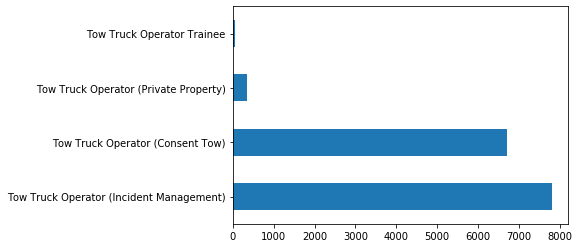

In [273]:
df[df.LICTYPE.str.contains('Tow Truck', na=False)].fillna(False).LICTYPE.value_counts().plot(kind='barh')

## 34. Calcuate the gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [274]:
# So when you do .value_counts(), it gives you an index and a value
df[df['GENDER'] == 'male'].LICTYPE.value_counts().head()

Apprentice Electrician    95604
Journeyman Electrician    35507
A/C Technician            24696
Master Electrician        15770
Cosmetology Operator      13543
Name: LICTYPE, dtype: int64

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [275]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['GENDER'] == 'male'].LICTYPE.value_counts(),
    df[df['GENDER'] == 'female'].LICTYPE.value_counts(),
    df[df['GENDER'].isnull()].LICTYPE.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

/Users/mara/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,LICTYPE,LICTYPE,LICTYPE
A/C CE Provider,NaN,NaN,56.0
A/C Contractor,3.0,2.0,16371.0
A/C Technician,24696.0,877.0,2386.0
Appliance Installation Contractor,NaN,NaN,668.0
Appliance Installer,1818.0,66.0,76.0


In [276]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

,index,LICTYPE,LICTYPE,LICTYPE
0,A/C CE Provider,NaN,NaN,56.0
1,A/C Contractor,3.0,2.0,16371.0
2,A/C Technician,24696.0,877.0,2386.0
3,Appliance Installation Contractor,NaN,NaN,668.0
4,Appliance Installer,1818.0,66.0,76.0


In [277]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

,license,male,female,unknown
0,A/C CE Provider,0.0,0.0,56.0
1,A/C Contractor,3.0,2.0,16371.0
2,A/C Technician,24696.0,877.0,2386.0
3,Appliance Installation Contractor,0.0,0.0,668.0
4,Appliance Installer,1818.0,66.0,76.0


## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

In [278]:
gender_df['total_licence'] = gender_df['male'] + gender_df['female']
gender_df['female_percentage'] = (gender_df.female/gender_df.total_licence)*100
gender_df['male_percentage'] = (gender_df.male/gender_df.total_licence)*100
gender_df.fillna(0, inplace=True)
gender_df.head(50)

,license,male,female,unknown,total_licence,female_percentage,male_percentage
0,A/C CE Provider,0.0,0.0,56.0,0.0,0.000000,0.000000
1,A/C Contractor,3.0,2.0,16371.0,5.0,40.000000,60.000000
2,A/C Technician,24696.0,877.0,2386.0,25573.0,3.429398,96.570602
3,Appliance Installation Contractor,0.0,0.0,668.0,0.0,0.000000,0.000000
4,Appliance Installer,1818.0,66.0,76.0,1884.0,3.503185,96.496815
5,Apprentice Electrician,95604.0,4786.0,10203.0,100390.0,4.767407,95.232593
6,Apprentice Sign Electrician,3366.0,174.0,454.0,3540.0,4.915254,95.084746
7,Associate Auctioneer,50.0,8.0,3.0,58.0,13.793103,86.206897
8,Auctioneer,1922.0,312.0,146.0,2234.0,13.965980,86.034020
9,Auctioneer CE Provider,0.0,0.0,19.0,0.0,0.000000,0.000000


## 35. What 10 licenses with more than 2,000 people and over 75% known has the most male owners? The most female?

In [279]:
gender_df['unknown_percentage'] = (gender_df.unknown/gender_df.total_licence)*100
gender_df[(gender_df['total_licence']>2000) & (gender_df['unknown_percentage']<25)].sort_values(by=['male'], ascending=False).head(10)

,license,male,female,unknown,total_licence,female_percentage,male_percentage,unknown_percentage
5,Apprentice Electrician,95604.0,4786.0,10203.0,100390.0,4.767407,95.232593,10.163363
60,Journeyman Electrician,35507.0,1025.0,1638.0,36532.0,2.805759,97.194241,4.483740
2,A/C Technician,24696.0,877.0,2386.0,25573.0,3.429398,96.570602,9.330153
68,Master Electrician,15770.0,393.0,647.0,16163.0,2.431479,97.568521,4.002970
41,Cosmetology Operator,13543.0,114598.0,23065.0,128141.0,89.431173,10.568827,17.999703
21,"Barber, Class A",9773.0,4098.0,2148.0,13871.0,29.543652,70.456348,15.485545
94,Tow Truck Operator (Incident Management),6851.0,343.0,610.0,7194.0,4.767862,95.232138,8.479288
93,Tow Truck Operator (Consent Tow),5779.0,276.0,648.0,6055.0,4.558216,95.441784,10.701899
64,Legal Service Contract Sales Rep,5662.0,4435.0,1339.0,10097.0,43.923938,56.076062,13.261365
52,Dual Towing Operator(IM)/VSF Employee,3662.0,267.0,244.0,3929.0,6.795622,93.204378,6.210232


In [280]:
gender_df[(gender_df['total_licence']>2000) & (gender_df['unknown_percentage']<25)].sort_values(by=['female'], ascending=False).head(10)

,license,male,female,unknown,total_licence,female_percentage,male_percentage,unknown_percentage
41,Cosmetology Operator,13543.0,114598.0,23065.0,128141.0,89.431173,10.568827,17.999703
5,Apprentice Electrician,95604.0,4786.0,10203.0,100390.0,4.767407,95.232593,10.163363
64,Legal Service Contract Sales Rep,5662.0,4435.0,1339.0,10097.0,43.923938,56.076062,13.261365
42,Cosmetology Operator Instructor,552.0,4393.0,800.0,4945.0,88.837209,11.162791,16.177958
21,"Barber, Class A",9773.0,4098.0,2148.0,13871.0,29.543652,70.456348,15.485545
99,VSF Employee,1434.0,1757.0,299.0,3191.0,55.061109,44.938891,9.370103
79,Property Tax Appraiser,1457.0,1176.0,213.0,2633.0,44.663882,55.336118,8.089632
60,Journeyman Electrician,35507.0,1025.0,1638.0,36532.0,2.805759,97.194241,4.483740
2,A/C Technician,24696.0,877.0,2386.0,25573.0,3.429398,96.570602,9.330153
98,Used Auto Parts Recycler Employee,1874.0,434.0,201.0,2308.0,18.804159,81.195841,8.708839


## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

In [198]:
violations_df = pd.read_csv("violations.csv")
violations_df.head()

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072
2,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066
3,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083
4,The Respondent's license was revoked upon Resp...,HOUSTON,COS20170005470,HARRIS,1209580,"NGUYEN, QUAN M",Respondent's Cosmetology Operator license was ...,2/24/2017,77077


### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

## 39. Find each violation involving a failure with records. Use a regular expression.

## 40. How much money was each fine? Use a regular expression and .str.extract (we talked about it before!)

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

## 42. Which orders results in the top fines?

## 43. Are you still here???

I'm sure impressed.